In [7]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjusts the configuration of the plots 

In [3]:
#Read the data

df = pd.read_csv(r'C:\Users\naman\Desktop\New folder\movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
# check for the missing data
for col in df.columns:
    pct_missing = np.sum(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0%
rating - 77%
genre - 0%
year - 0%
released - 2%
score - 3%
votes - 3%
director - 0%
writer - 3%
star - 1%
country - 3%
budget - 2171%
gross - 189%
company - 17%
runtime - 4%


In [10]:
#handing he null values
df.dropna(inplace=True)

In [12]:
#Changing Data types to int for Votes, Budget and Gross
df['votes']=df['votes'].astype('int64')
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [13]:
#ordering by the gross revenue
df.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [14]:
#drop the duplicate value 
df=df.drop_duplicates()

# # Finding the correlation 

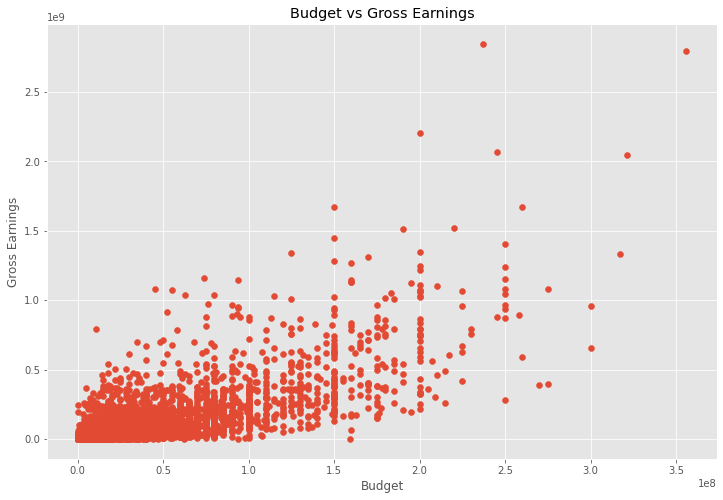

In [16]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

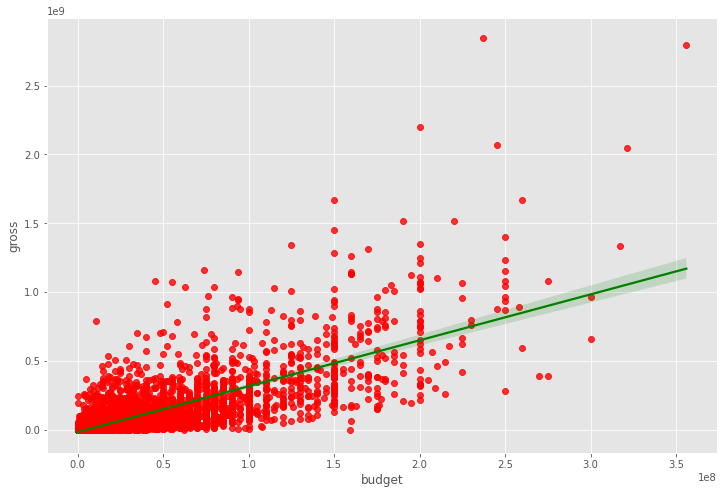

In [19]:
#Plot budget Vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [20]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


#High correlation between budget and gross

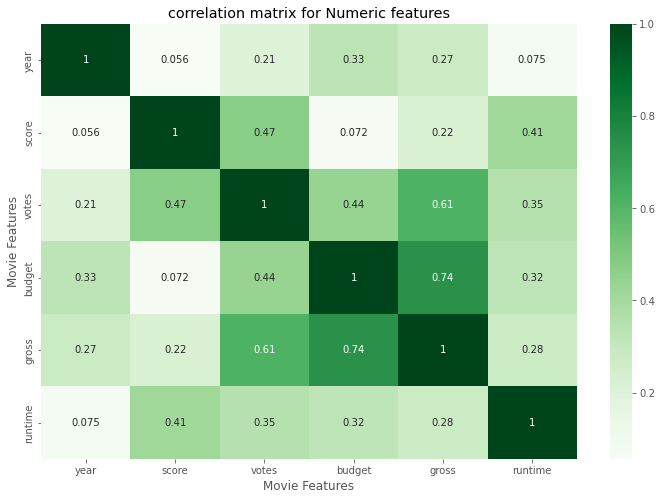

In [24]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True,cmap='Greens')
plt.title('correlation matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
# look at comapny
df['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [27]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


In [28]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


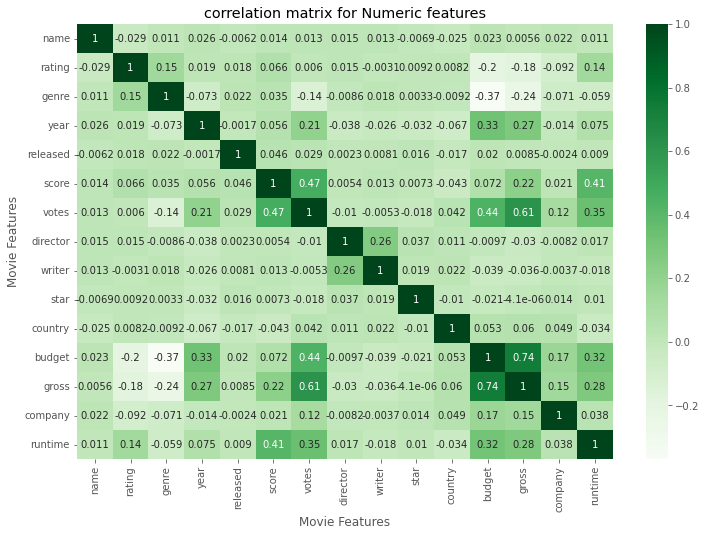

In [29]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True,cmap='Greens')
plt.title('correlation matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [35]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [36]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Votes and budget have the highest correlation to gross earnings